In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('ggplot')

df = pd.read_csv('kc_house_data.csv')

In [9]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [10]:
df.info()
#waterfront has null values
#view has null values
#yr_renovated has null values 
#date and sqft_basement have dtype object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [11]:
df['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [12]:
df['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [13]:
#drop basement and yr_renovated as they have too many zeros
df.drop(['sqft_basement', 'yr_renovated'], axis=1, inplace=True)

In [14]:
#drop rows where waterfront is none numeric
df = df[np.isfinite(df['waterfront'])]
df.reset_index(drop=True, inplace=True)
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
1,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
2,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
3,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503
4,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,98053,47.6561,-122.005,4760,101930
5,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,98003,47.3097,-122.327,2238,6819
6,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,1963,98198,47.4095,-122.315,1650,9711
7,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,1960,98146,47.5123,-122.337,1780,8113
8,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,2003,98038,47.3684,-122.031,2390,7570
9,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,7,860,1942,98115,47.6900,-122.292,1330,6000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19221 entries, 0 to 19220
Data columns (total 19 columns):
id               19221 non-null int64
date             19221 non-null object
price            19221 non-null float64
bedrooms         19221 non-null int64
bathrooms        19221 non-null float64
sqft_living      19221 non-null int64
sqft_lot         19221 non-null int64
floors           19221 non-null float64
waterfront       19221 non-null float64
view             19164 non-null float64
condition        19221 non-null int64
grade            19221 non-null int64
sqft_above       19221 non-null int64
yr_built         19221 non-null int64
zipcode          19221 non-null int64
lat              19221 non-null float64
long             19221 non-null float64
sqft_living15    19221 non-null int64
sqft_lot15       19221 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 2.8+ MB


In [16]:
# convert date into datetime obj. & extract year-month 
df['date'] = pd.to_datetime(df['date'])
# df['date'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19221 entries, 0 to 19220
Data columns (total 19 columns):
id               19221 non-null int64
date             19221 non-null datetime64[ns]
price            19221 non-null float64
bedrooms         19221 non-null int64
bathrooms        19221 non-null float64
sqft_living      19221 non-null int64
sqft_lot         19221 non-null int64
floors           19221 non-null float64
waterfront       19221 non-null float64
view             19164 non-null float64
condition        19221 non-null int64
grade            19221 non-null int64
sqft_above       19221 non-null int64
yr_built         19221 non-null int64
zipcode          19221 non-null int64
lat              19221 non-null float64
long             19221 non-null float64
sqft_living15    19221 non-null int64
sqft_lot15       19221 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(11)
memory usage: 2.8 MB


In [17]:
# drop nulls in view column 
df = df[np.isfinite(df['view'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 0 to 19220
Data columns (total 19 columns):
id               19164 non-null int64
date             19164 non-null datetime64[ns]
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_living      19164 non-null int64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null float64
view             19164 non-null float64
condition        19164 non-null int64
grade            19164 non-null int64
sqft_above       19164 non-null int64
yr_built         19164 non-null int64
zipcode          19164 non-null int64
lat              19164 non-null float64
long             19164 non-null float64
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(11)
memory usage: 2.9 MB


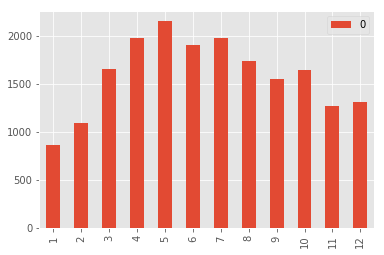

In [18]:
# show df['date'] in histogram 
from collections import Counter
date_counts = Counter(df['date'].dt.month)
df_date = pd.DataFrame.from_dict(date_counts, orient='index')
df_date.sort_index().plot(kind='bar')

In [19]:
# check linearity of discrete independent variables

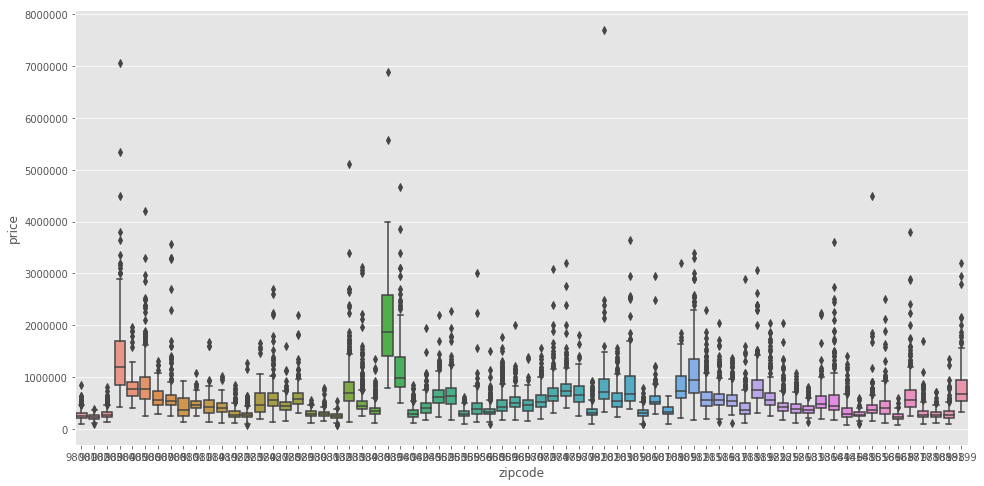

In [20]:
col = 'zipcode'
fig = plt.subplots(figsize=(16, 8))
sns.boxplot(x=col, y='price', data=df)
#bin zip or drop 
#no linear relationship w/ price

In [21]:
#bin zipcode as it doesn't dipslay cloud like scatter plot, transform into categorical variable
df['zipcode'].describe()

count    19164.000000
mean     98077.726466
std         53.448716
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98117.000000
max      98199.000000
Name: zipcode, dtype: float64

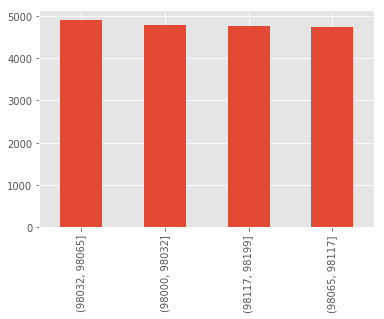

In [22]:
bins = [98000, 98032, 98065, 98117, 98199]
bins_zip = pd.cut(df['zipcode'], bins)
bins_zip = bins_zip.cat.as_unordered()
bins_zip.head()
bins_zip.value_counts().plot(kind='bar')
plt.show()

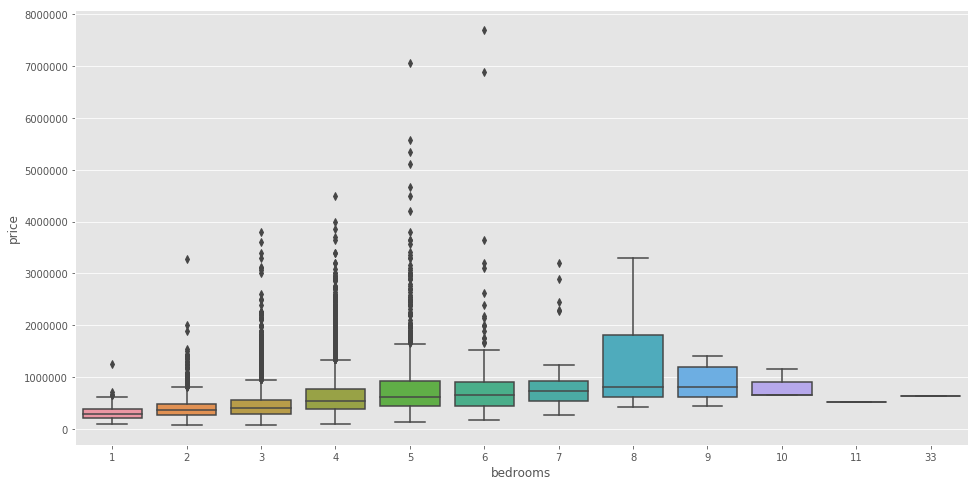

In [23]:
col = 'bedrooms'
fig = plt.subplots(figsize=(16, 8))
sns.boxplot(x=col, y='price', data=df)
#shows bedrooms has a linear correlation w/ price
#has an outlier at 33

In [24]:
df['bedrooms'].describe()

count    19164.000000
mean         3.374452
std          0.928676
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

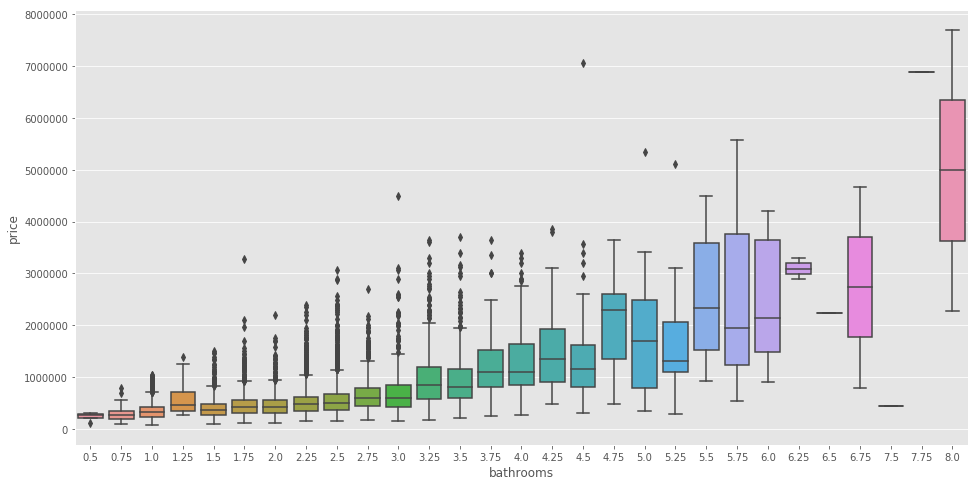

In [25]:
col = 'bathrooms'
fig = plt.subplots(figsize=(16, 8))
sns.boxplot(x=col, y='price', data=df)
#shows bathrooms has a linear correlation w/ price

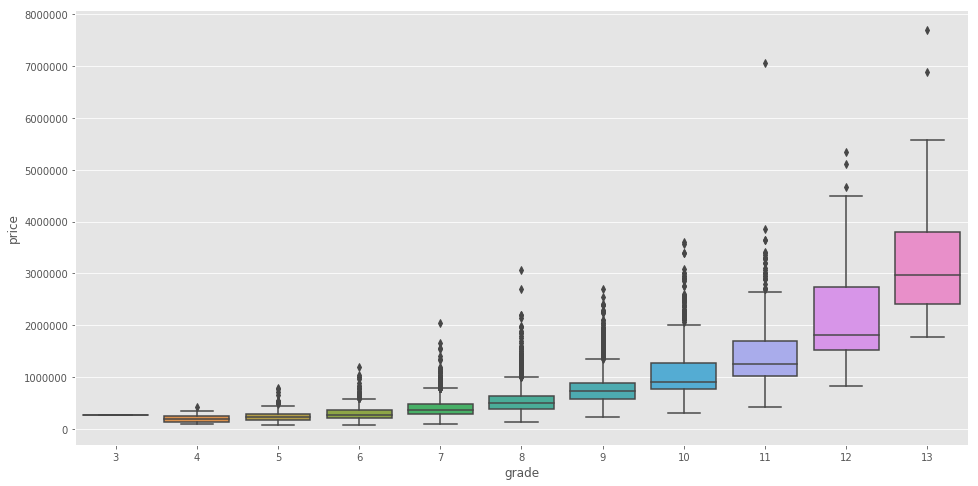

In [26]:
col = 'grade'
fig = plt.subplots(figsize=(16, 8))
sns.boxplot(x=col, y='price', data=df)
#shows grade has a linear correlation w/ price

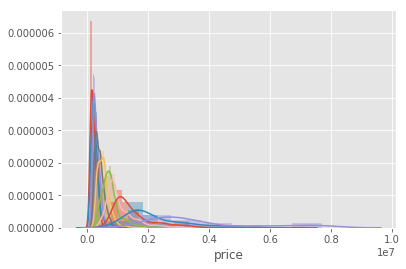

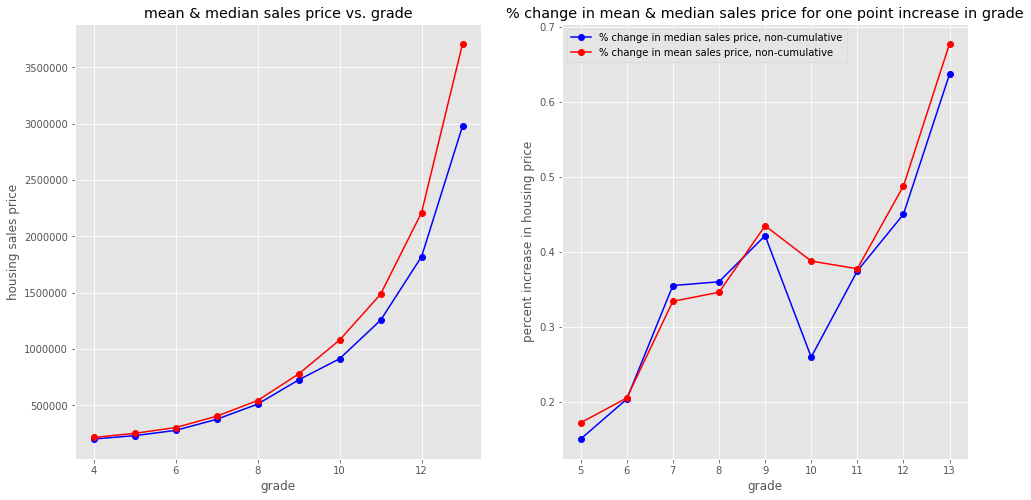

In [30]:
#check how prices differ by each grade bucket

a = list(range(4, 14))
med = []
mean = []
med_pct = []
mean_pct = []
for ix, i in enumerate(a):
    df_grade = df[df['grade'] == i]
    med.append(df_grade['price'].median())
    mean.append(df_grade['price'].mean())
    if ix != 0:
        med_pct.append((med[ix]-med[ix-1])/med[ix-1])
        mean_pct.append((mean[ix]-mean[ix-1])/mean[ix-1])
    sns.distplot(df_grade['price'], norm_hist=True)

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(16, 8))
ax.plot(list(range(4,14)), med, '-o', c='b', label='median sales price')
ax.plot(list(range(4,14)), mean, '-o', c='r', label='mean sales price')
ax1.plot(list(range(5,14)), med_pct, '-o', c='b', label='% change in median sales price, non-cumulative')
ax1.plot(list(range(5,14)), mean_pct, '-o', c='r', label='% change in mean sales price, non-cumulative')
ax.set_title('mean & median sales price vs. grade')
ax1.set_title('% change in mean & median sales price for one point increase in grade')
ax.set_xlabel('grade')
ax1.set_xlabel('grade')
ax.set_ylabel('housing sales price')
ax1.set_ylabel('percent increase in housing price')
plt.legend(loc='upper left')

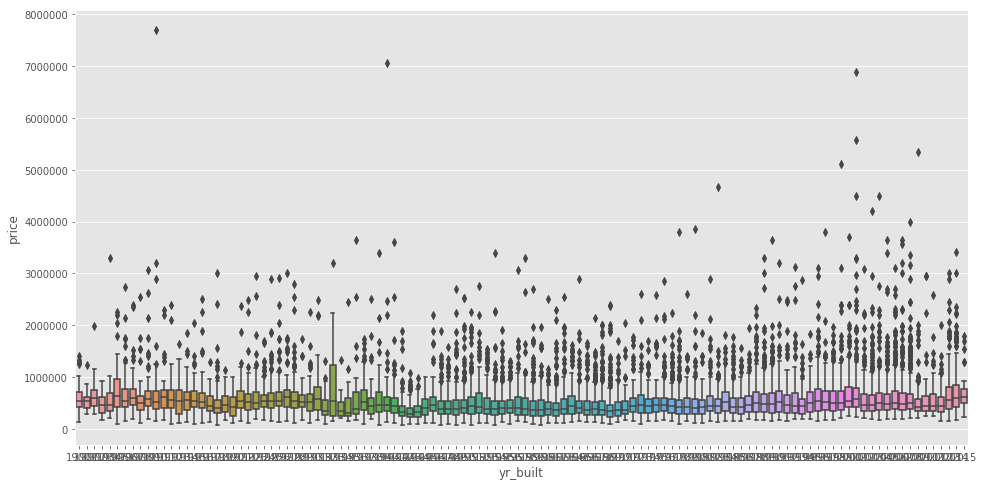

In [31]:
col = 'yr_built'
fig = plt.subplots(figsize=(16, 8))
sns.boxplot(x=col, y='price', data=df)


In [32]:
#doesn't show yr_built has a linear relationship w/ price
#bin yr_built
df['yr_built'].describe()

count    19164.000000
mean      1971.039553
std         29.388020
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

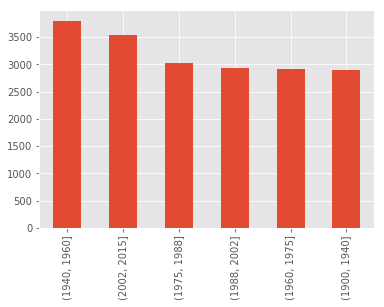

In [33]:
bins = [1900, 1940, 1960, 1975, 1988, 2002, 2015]
bins_yr_built = pd.cut(df['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_unordered()
bins_yr_built.value_counts().plot(kind='bar')
plt.show()

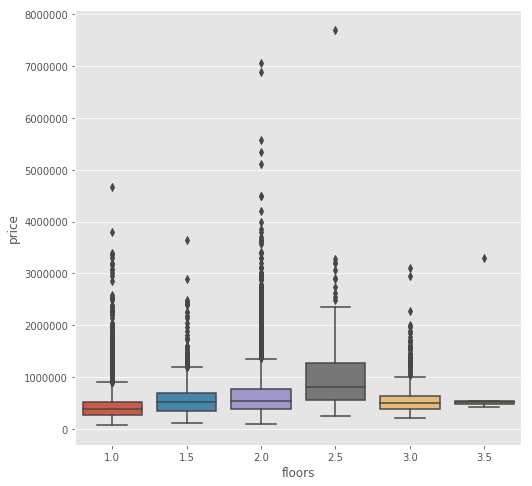

In [38]:
col = 'floors'
fig = plt.subplots(figsize=(8, 8))
sns.boxplot(x=col, y='price', data=df)
#doesn't show strong linear relationship between floors and price

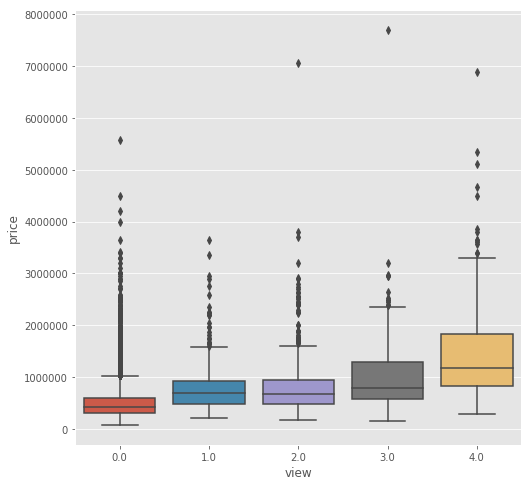

In [39]:
col = 'view'
fig = plt.subplots(figsize=(8, 8))
sns.boxplot(x=col, y='price', data=df)
#shows view has a linear relationship w/ price

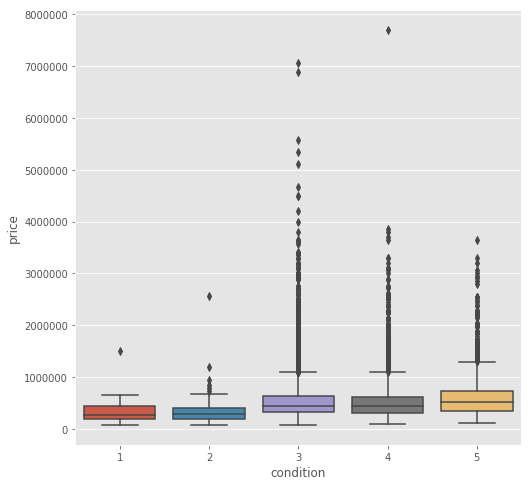

In [40]:
col = 'condition'
fig = plt.subplots(figsize=(8, 8))
sns.boxplot(x=col, y='price', data=df)
#shows a slight linear relationship between condition and price

In [41]:
#drop the columns not going to be used from df to create a dataframe called predictors 
predictors = df.drop(['id', 'price', 'date'], axis=1)

In [42]:
#get dummies w/o binning: waterfront, view, condition, bedrooms, bathrooms, grade, floors
#fill NaNs in column waterfront with 0 instead of dropping the rows to avoid further eliminating data points
df['waterfront'].fillna(0, inplace=True)
wf_dummies = pd.get_dummies(df["waterfront"], prefix="wf")
view_dummies = pd.get_dummies(df["view"], prefix="view")
condition_dummies = pd.get_dummies(df["condition"], prefix="cond")
bed_dummies = pd.get_dummies(df['bedrooms'], prefix='bed')
bath_dummies = pd.get_dummies(df['bathrooms'], prefix='bath')
grade_dummies = pd.get_dummies(df['grade'], prefix='gr')
floors_dummies = pd.get_dummies(df['floors'], prefix='flr')

#get dummies for the binned zipcode 
zip_dummies = pd.get_dummies(bins_zip, prefix="zip")
yr_built_dummies = pd.get_dummies(bins_yr_built, prefix='built')

In [43]:
# drop columns from predictors where we created dummies variables and add the dummies columns
predictors = predictors.drop(['waterfront', 'zipcode', 'view', 'condition', 'bedrooms', 'bathrooms', 'grade', 'floors', 'yr_built'], axis=1)
predictors = pd.concat([predictors, wf_dummies, zip_dummies, view_dummies, condition_dummies, bed_dummies, bath_dummies, grade_dummies, floors_dummies, yr_built_dummies], axis=1)
predictors.head()

,sqft_living,sqft_lot,sqft_above,lat,long,sqft_living15,sqft_lot15,wf_0.0,wf_1.0,"zip_(98000, 98032]",...,flr_2.0,flr_2.5,flr_3.0,flr_3.5,"built_(1900, 1940]","built_(1940, 1960]","built_(1960, 1975]","built_(1975, 1988]","built_(1988, 2002]","built_(2002, 2015]"
0,2570,7242,2170,47.7210,-122.319,1690,7639,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,770,10000,770,47.7379,-122.233,2720,8062,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1960,5000,1050,47.5208,-122.393,1360,5000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1680,8080,1680,47.6168,-122.045,1800,7503,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5420,101930,3890,47.6561,-122.005,4760,101930,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 0 to 19220
Data columns (total 87 columns):
sqft_living           19164 non-null int64
sqft_lot              19164 non-null int64
sqft_above            19164 non-null int64
lat                   19164 non-null float64
long                  19164 non-null float64
sqft_living15         19164 non-null int64
sqft_lot15            19164 non-null int64
wf_0.0                19164 non-null uint8
wf_1.0                19164 non-null uint8
zip_(98000, 98032]    19164 non-null uint8
zip_(98032, 98065]    19164 non-null uint8
zip_(98065, 98117]    19164 non-null uint8
zip_(98117, 98199]    19164 non-null uint8
view_0.0              19164 non-null uint8
view_1.0              19164 non-null uint8
view_2.0              19164 non-null uint8
view_3.0              19164 non-null uint8
view_4.0              19164 non-null uint8
cond_1                19164 non-null uint8
cond_2                19164 non-null uint8
cond_3                19164

In [45]:
#transform the dummies columns into category obj.
for i in predictors.iloc[:, 7:].columns:
    predictors[i] = predictors[i].astype('category')

In [46]:
#replace '.', '[]', '()', ' ', ',' in column names with '_' or eliminate them
predictors.columns = predictors.columns.str.replace('[.]', '_')
predictors.columns = predictors.columns.str.replace('[]]', '')
predictors.columns = predictors.columns.str.replace('[()]', '')
predictors.columns = predictors.columns.str.replace('[ ]', '')
predictors.columns = predictors.columns.str.replace('[,]', '_')

In [47]:
predictors.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'wf_0_0', 'wf_1_0', 'zip_98000_98032', 'zip_98032_98065',
       'zip_98065_98117', 'zip_98117_98199', 'view_0_0', 'view_1_0',
       'view_2_0', 'view_3_0', 'view_4_0', 'cond_1', 'cond_2', 'cond_3',
       'cond_4', 'cond_5', 'bed_1', 'bed_2', 'bed_3', 'bed_4', 'bed_5',
       'bed_6', 'bed_7', 'bed_8', 'bed_9', 'bed_10', 'bed_11', 'bed_33',
       'bath_0_5', 'bath_0_75', 'bath_1_0', 'bath_1_25', 'bath_1_5',
       'bath_1_75', 'bath_2_0', 'bath_2_25', 'bath_2_5', 'bath_2_75',
       'bath_3_0', 'bath_3_25', 'bath_3_5', 'bath_3_75', 'bath_4_0',
       'bath_4_25', 'bath_4_5', 'bath_4_75', 'bath_5_0', 'bath_5_25',
       'bath_5_5', 'bath_5_75', 'bath_6_0', 'bath_6_25', 'bath_6_5',
       'bath_6_75', 'bath_7_5', 'bath_7_75', 'bath_8_0', 'gr_3', 'gr_4',
       'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12',
       'gr_13', 'flr_1_0', 'flr_1_5', 'flr_2_0', 'flr_2_5', 

In [48]:
# create a dataframe called 'pre_cont' by selecting all continuous features from predictors
pre_cont = predictors.loc[:, ['sqft_living', 'sqft_lot', 'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [49]:
# check the r_squared, intercept, slope, and p-value of the continuous features, or all columns in pre_cont
# get these values by running an OLS regression, by predicting the y-values using the minimum and maximum values of each of the 
# continuous features using model.predict where model = smf.ols(formula=, data=).fit()
import statsmodels.formula.api as smf

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(pre_cont.columns):
    print ("KC Housing: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    preds = model.predict()
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

KC Housing: price~sqft_living
------------------------------
['sqft_living', 0.49621925489764762, -48604.077595730225, 283.40162518668649, 0.0]
KC Housing: price~sqft_lot
------------------------------
['sqft_lot', 0.0076439991637455851, 529469.70640866761, 0.79534333350604236, 7.7175542841864869e-34]
KC Housing: price~sqft_above
------------------------------
['sqft_above', 0.37162566269635777, 54477.968459976983, 271.83436337594867, 0.0]
KC Housing: price~lat
------------------------------
['lat', 0.093863957230066797, -38434411.509123594, 819508.95420325955, 0.0]
KC Housing: price~long
------------------------------
['long', 0.0004714971435693105, 7535649.1303808494, 57229.119017601435, 0.002646095254889117]
KC Housing: price~sqft_living15
------------------------------
['sqft_living15', 0.33924807138773783, -85464.304533309652, 315.47220430144228, 0.0]
KC Housing: price~sqft_lot15
------------------------------
['sqft_lot15', 0.006652407359942325, 527397.72276895307, 1.097954200317

In [50]:
df['price'].describe()

count    1.916400e+04
mean     5.414490e+05
std      3.709009e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.439625e+05
max      7.700000e+06
Name: price, dtype: float64

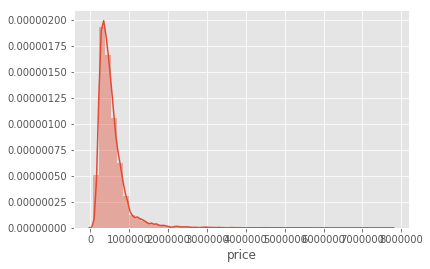

In [51]:
sns.distplot(df['price'])
plt.show()
#kc housing sales prices show significant positive skew
#shows peakedness
#high kurtosis, leptokurtic
#needs to be normalized 

In [52]:
# log transform price as it's positively skewed 
df_log = df.copy()
df_log['price'] = np.log(df['price'])

In [53]:
print(('skewness: %f') % df['price'].skew())
print(('kurtosis: %f') % df['price'].kurt())

skewness: 4.081095
kurtosis: 35.301205


In [54]:
# check the r_squared, intercept, slope, and p-value of the continuous features using log-transformed price as the target
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(pre_cont.columns):
    print ("KC Housing: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_log).fit()
    preds = model.predict()
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

# use log-tranformed prices as it generates higher R-squared for most continuous features

KC Housing: price~sqft_living
------------------------------
['sqft_living', 0.48509451563093198, 12.220259474895627, 0.00039827309586627877, 0.0]
KC Housing: price~sqft_lot
------------------------------
['sqft_lot', 0.0098203476301645942, 13.030180299311468, 1.2813271189208555e-06, 4.9912081742963245e-43]
KC Housing: price~sqft_above
------------------------------
['sqft_above', 0.36637226356018759, 12.362230823864103, 0.00038363220604985097, 0.0]
KC Housing: price~lat
------------------------------
['lat', 0.2034655679829358, -68.513672914823161, 1.7149520954665554, 0.0]
KC Housing: price~long
------------------------------
['long', 0.0026881168364777386, 36.786425885713726, 0.19422442987757774, 6.8818640764643826e-13]
KC Housing: price~sqft_living15
------------------------------
['sqft_living15', 0.38141523922862719, 12.10465721384505, 0.00047544872220399567, 0.0]
KC Housing: price~sqft_lot15
------------------------------
['sqft_lot15', 0.0083937927887763886, 13.02704532347424, 1

In [55]:
# drop features that have < .01 R^2
predictors['price'] = df_log['price']
predictors.drop(['sqft_lot', 'long', 'sqft_lot15'], axis=1, inplace=True)


# predictors = predictors[predictors.columns.drop(list(predictors.filter(regex='cond')))]

#drop one column from each categorical variable's dummies
predictors.drop(['zip_98117_98199', 'flr_1_0', 'bed_33', 'bath_8_0', 'gr_13', 'view_4_0', 'built_1900_1940'], axis=1, inplace=True)

In [56]:
# create separate dataframes for each group of the categorical variable dummies
col_wf = predictors[list(predictors.filter(regex='wf'))]
col_view = predictors[list(predictors.filter(regex='view'))]
col_gr = predictors[list(predictors.filter(regex='gr'))]
col_bed = predictors[list(predictors.filter(regex='bed'))]
col_bath = predictors[list(predictors.filter(regex='bath'))]
col_zip = predictors[list(predictors.filter(regex='zip'))]
col_flr = predictors[list(predictors.filter(regex='flr'))]
col_built = predictors[list(predictors.filter(regex='built'))]

cols = [col_wf, col_view, col_gr, col_bed, col_bath, col_flr, col_zip, col_built]

# check the regression metrics of the different groups of the categorical variable dummies by fitting OLS regression for 
# each of the categorical variable against log-transformed price
for col in cols:
    sum_cols = '+'.join(col)
    form = 'price~' + sum_cols
    model = smf.ols(formula=form, data=predictors).fit()
    print(model.summary())

df_log.head()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     632.3
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          2.68e-137
Time:                        15:07:04   Log-Likelihood:                -14612.
No. Observations:               19164   AIC:                         2.923e+04
Df Residuals:                   19162   BIC:                         2.924e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.0566      0.014    628.346      

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     319.9
Date:                Thu, 31 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:07:04   Log-Likelihood:                -11244.
No. Observations:               19164   AIC:                         2.255e+04
Df Residuals:                   19135   BIC:                         2.277e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.2482      0.308     49.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,6414100192,2014-12-09,13.195614,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
1,5631500400,2015-02-25,12.100712,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
2,2487200875,2014-12-09,13.311329,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
3,1954400510,2015-02-18,13.142166,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503
4,7237550310,2014-05-12,14.022525,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,98053,47.6561,-122.005,4760,101930


In [57]:
#drop the predictors that have p-values higher than .05
predictors = predictors[predictors.columns.drop(list(predictors.filter(regex='bed')))].copy()
predictors.drop(['bath_5_5', 'bath_6_0', 'bath_6_25', 'bath_6_5', 'bath_6_75', 'bath_7_75', 'built_1988_2002'], axis=1, inplace=True)

In [58]:
predictors.columns
predictors.head()

,sqft_living,sqft_above,lat,sqft_living15,wf_0_0,wf_1_0,zip_98000_98032,zip_98032_98065,zip_98065_98117,view_0_0,...,flr_1_5,flr_2_0,flr_2_5,flr_3_0,flr_3_5,built_1940_1960,built_1960_1975,built_1975_1988,built_2002_2015,price
0,2570,2170,47.7210,1690,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,13.195614
1,770,770,47.7379,2720,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,12.100712
2,1960,1050,47.5208,1360,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,13.311329
3,1680,1680,47.6168,1800,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,13.142166
4,5420,3890,47.6561,4760,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,14.022525


In [59]:
# drop features that have < .01 R^2
pre_cont.drop(['sqft_lot', 'long', 'sqft_lot15'], axis=1, inplace=True)

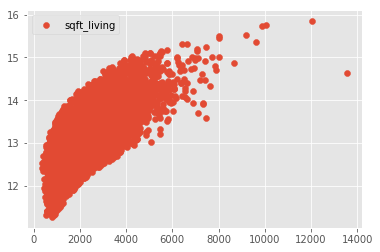

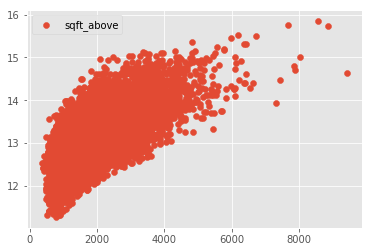

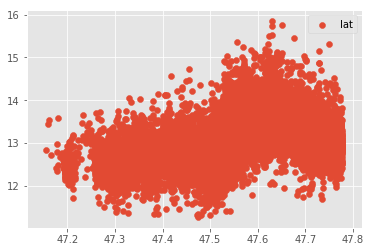

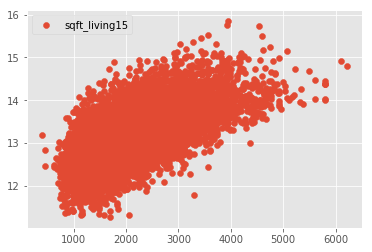

In [60]:
#check linearity of remaining continuous features against log transformed price
for column in pre_cont.columns:
    plt.scatter(pre_cont[column], df_log['price'], label=column)
    plt.legend()
    plt.show()


In [61]:
#sqft_living shows strong linear correlation
#sqft_above shows linear correlation with some outliers
#sqft_living15 shows linear coorelation with lots of outliers
#lat shows linear correlation with lots of outliers


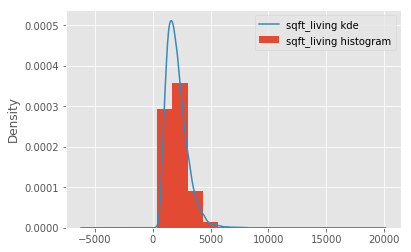

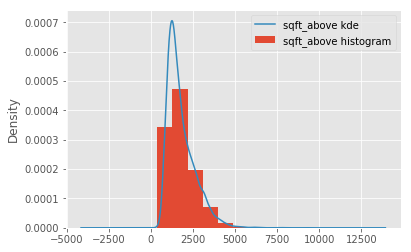

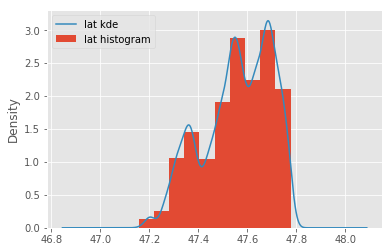

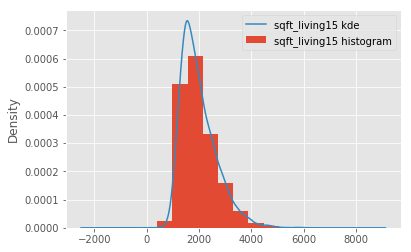

In [62]:
#check normality of the continuous features
for column in pre_cont:
    pre_cont[column].plot.hist(normed=True, label = column+' histogram')
    pre_cont[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [63]:
# the conitnuous features all appear to be skewed. Need transformation

C:\Program Files\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


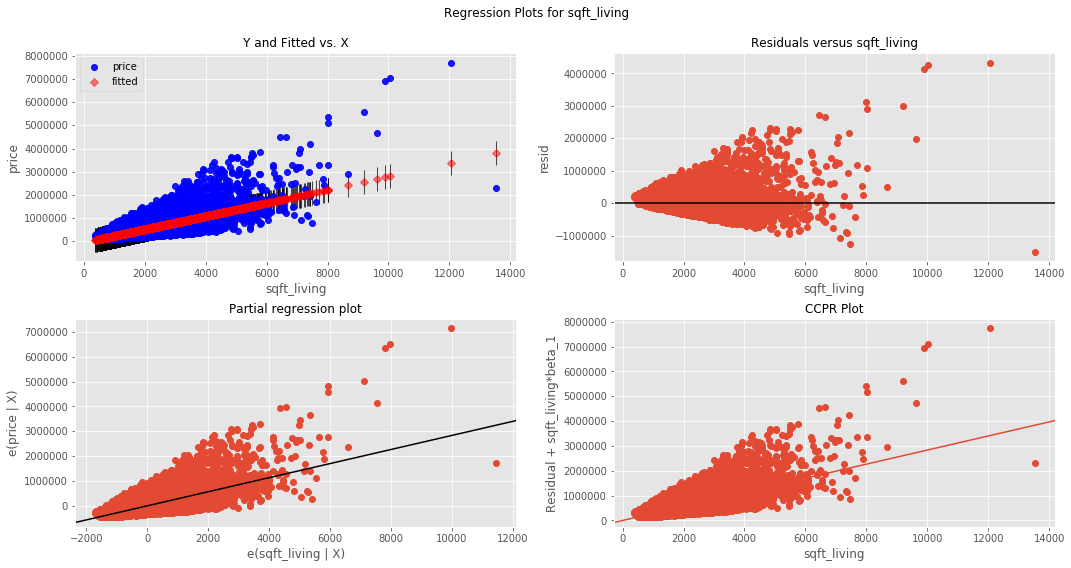

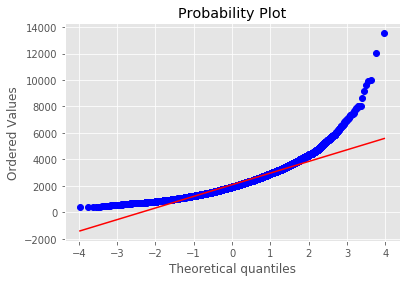

skewness: 1.503707
kurtosis: 5.553918


In [51]:
# check the normality of the residuals of the continuous features
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
fig_1 = plt.figure()
fig_1 = stats.probplot(df['sqft_living'], plot=plt)
plt.show()

print("skewness: %f" % df['sqft_living'].skew())
print("kurtosis: %f" % df['sqft_living'].kurt())


# From the first and second plot in the first row, we see that the variance is creating a cone-shape which is a sign of heteroscedasticity. i.e. the residuals are not normally distributed . 
# Skewness > 1, positively skewed 
# Kurtosis > 3, Leptokurtic, fat tails

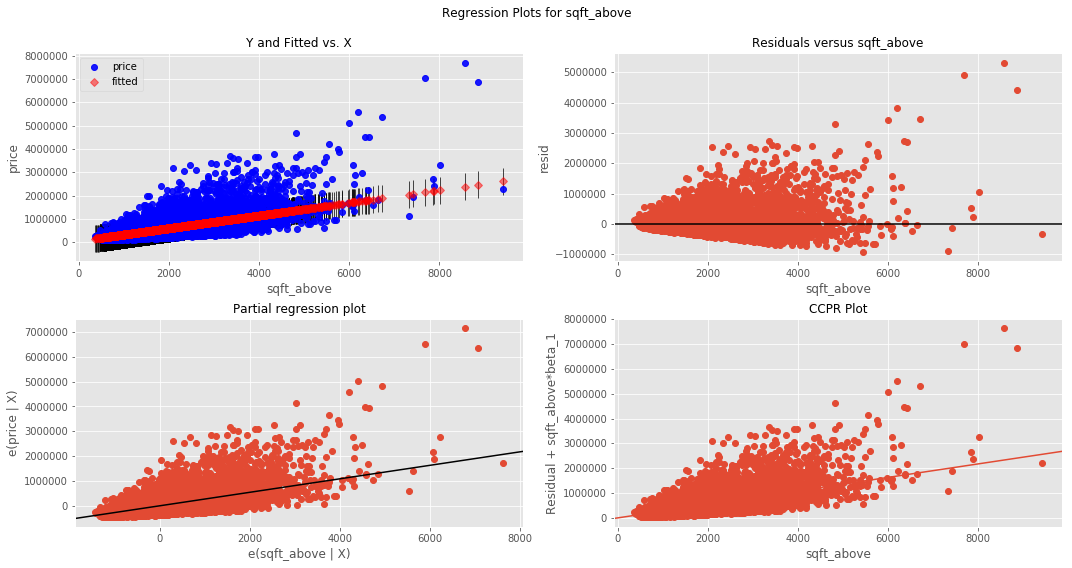

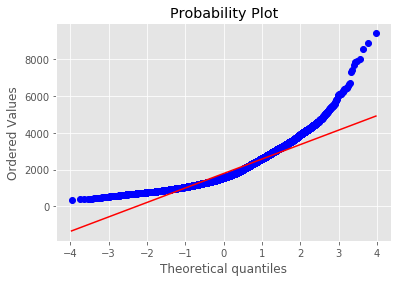

skewness: 1.456851
kurtosis: 3.504268


In [52]:
f = 'price~sqft_above'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_above', fig=fig)
fig_1 = plt.figure()
fig_1 = stats.probplot(df['sqft_above'], plot=plt)
plt.show()

print("skewness: %f" % df['sqft_above'].skew())
print("kurtosis: %f" % df ['sqft_above'].kurt())

# From the first and second plot in the first row, we see that the variance is creating a cone-shape which is a sign of heteroscedasticity. i.e. the residuals are not normally distributed . 
# Skewness > 1, positively skewed 
# Kurtosis slightly > 3, Leptokurtic, slightly fatter tails than normal distribution

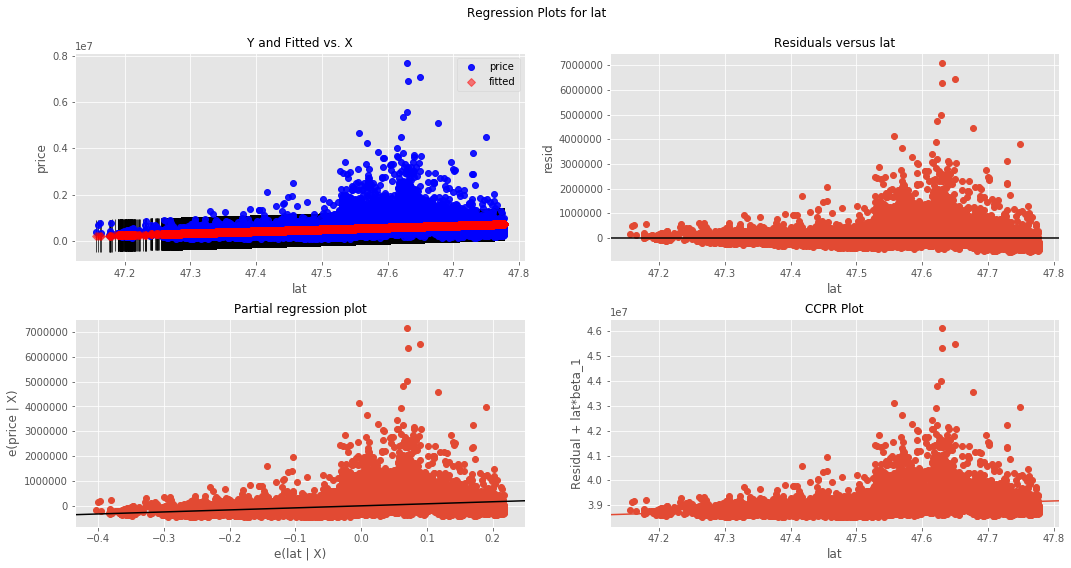

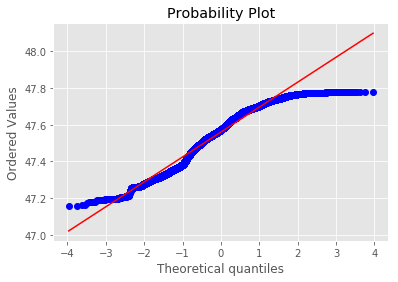

skewness: -0.487642
kurtosis: -0.677644


In [110]:
f = 'price~lat'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'lat', fig=fig)
fig_1 = plt.figure()
fig_1 = stats.probplot(df['lat'], plot=plt)
plt.show()

print("skewness: %f" % df['lat'].skew())
print("kurtosis: %f" % df ['lat'].kurt())
# From the first and second plot in the first row, we see that the variance is creating a cone-shape which is a sign of heteroscedasticity. i.e. the residuals are not normally distributed . 
# Skewness <0, negatively skewed 
# Kurtosis slightly negative, lighter tails than normal distribution

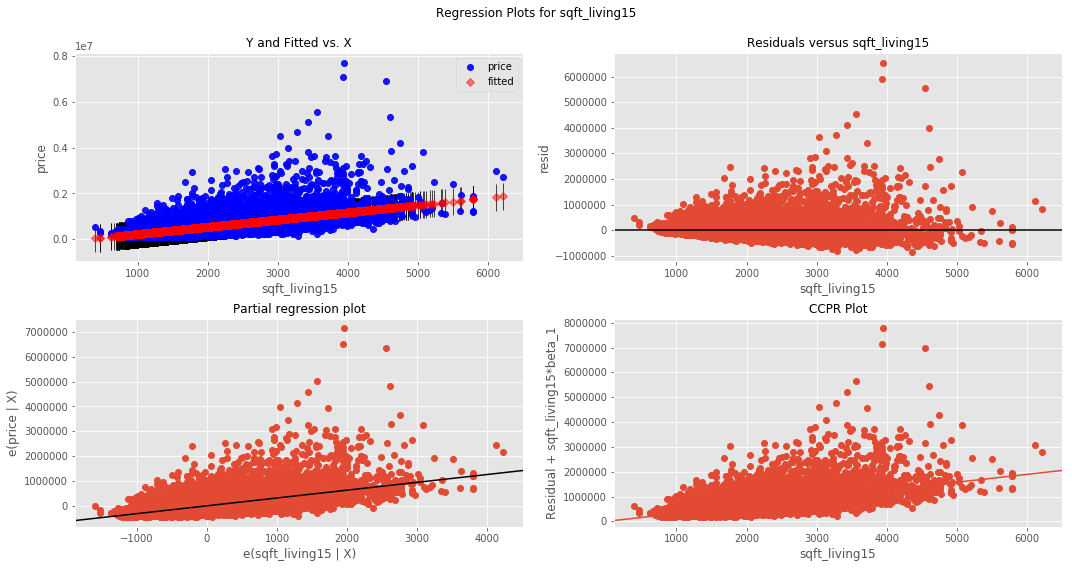

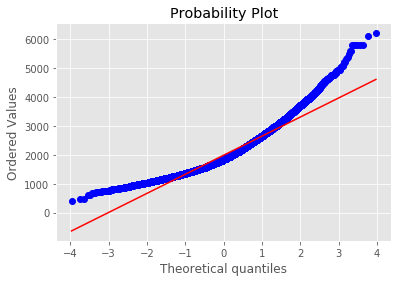

skewness: 1.117659
kurtosis: 1.667863


In [111]:
#Index(['sqft_living15', 'sqft_lot15'],dtype='object')

f = 'price~sqft_living15'
# create a fitted model in one line
model = smf.ols(formula=f, data=df).fit()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living15', fig=fig)
fig_1 = plt.figure()
fig_1 = stats.probplot(df['sqft_living15'], plot=plt)
plt.show()

print("skewness: %f" % df['sqft_living15'].skew())
print("kurtosis: %f" % df ['sqft_living15'].kurt())

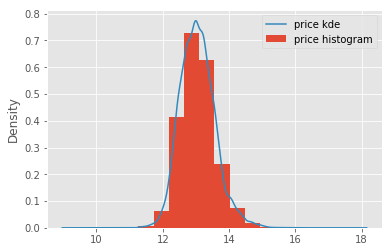

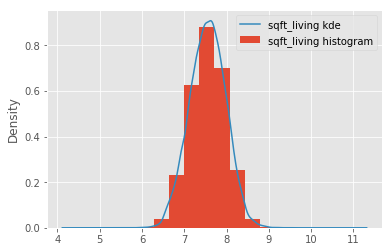

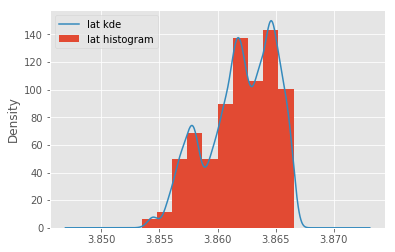

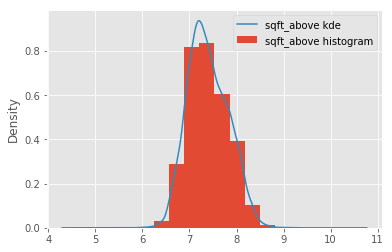

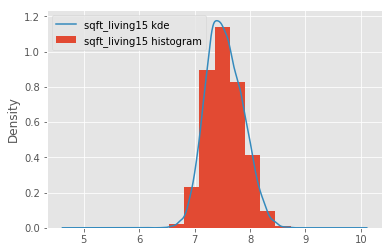

,price,sqft_living,lat,sqft_above,sqft_living15
0,13.195614,7.851661,3.865372,7.682482,7.432484
1,12.100712,6.646391,3.865726,6.646391,7.908387
2,13.311329,7.580700,3.861168,6.956545,7.215240
3,13.142166,7.426549,3.863186,7.426549,7.495542
4,14.022525,8.597851,3.864011,8.266164,8.468003


In [114]:
#log normalize the continuous features
pred_log = pd.DataFrame([])
pred_log['price'] = df_log['price']
pred_log['sqft_living'] = np.log(pre_cont['sqft_living'])
pred_log['lat'] = np.log(pre_cont['lat'])
pred_log['sqft_above'] = np.log(pre_cont['sqft_above'])
pred_log['sqft_living15'] = np.log(pre_cont['sqft_living15'])

for column in pred_log:
    pred_log[column].plot.hist(normed=True, label = column+' histogram')
    pred_log[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

pred_log.head()

In [115]:
# log transformations normalized price, sqft_living, sqft_above and sqft_living15
# log transformation has no effect on lat

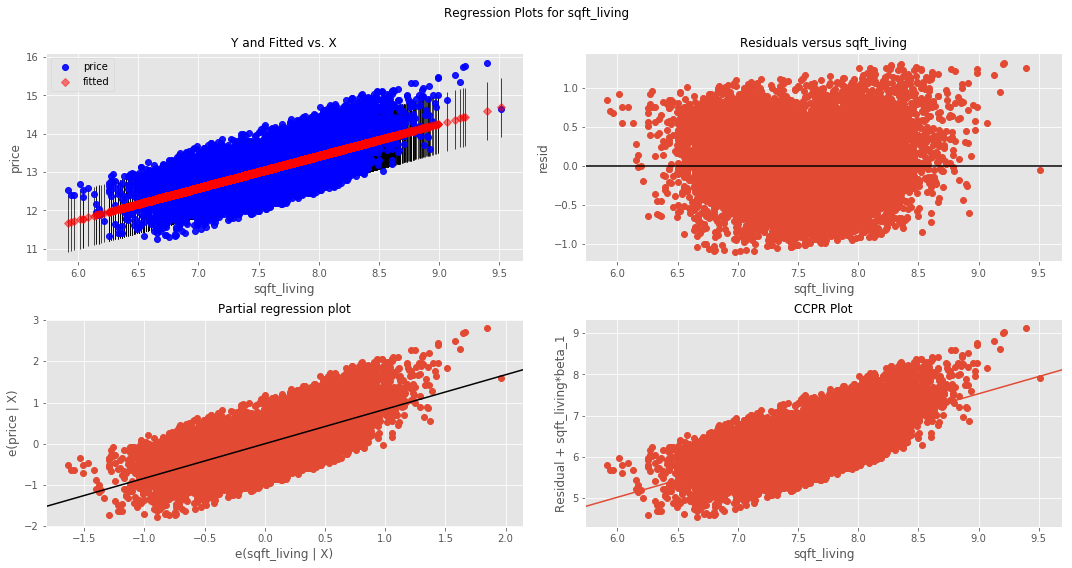

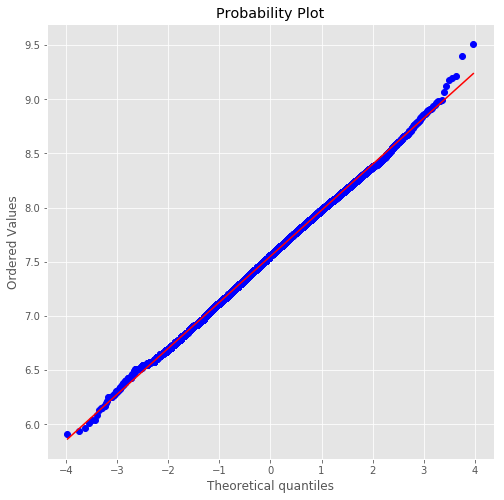

skewness: -0.026652
kurtosis: -0.065749


In [116]:
# check normality of residuals after log transformation of the continuous features
f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=pred_log).fit()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
fig = plt.figure(figsize=(8,8))
fig = stats.probplot(pred_log['sqft_living'], plot=plt)
plt.show()

print("skewness: %f" % pred_log['sqft_living'].skew())
print("kurtosis: %f" % pred_log['sqft_living'].kurt())
# From the first and second plot in the first row, residual plot no longer cone-shape after sqft_above log normalized 
# residuals now normally distributed
# slight negative skew
# slightly lighter tails than normal distribution 

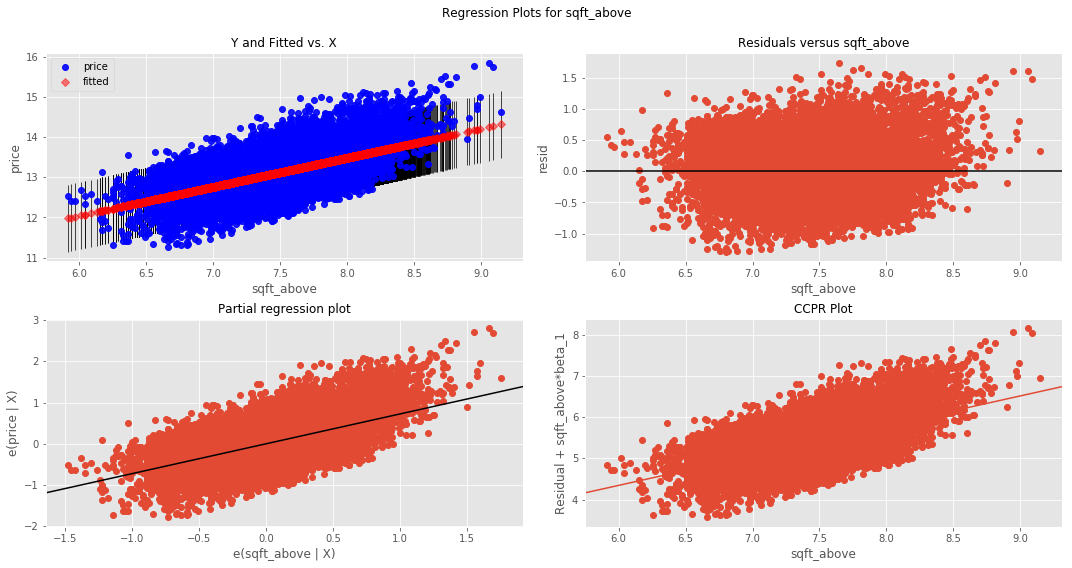

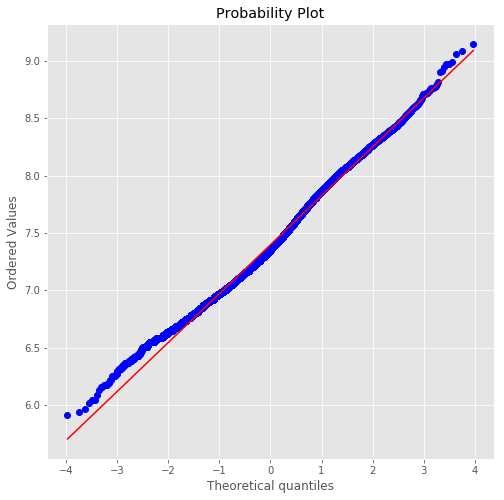

skewness: 0.256045
kurtosis: -0.331582


In [117]:
f = 'price~sqft_above'
# create a fitted model in one line
model = smf.ols(formula=f, data=pred_log).fit()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_above', fig=fig)
fig = plt.figure(figsize=(8,8))
fig = stats.probplot(pred_log['sqft_above'], plot=plt)
plt.show()

print("skewness: %f" % pred_log['sqft_above'].skew())
print("kurtosis: %f" % pred_log['sqft_above'].kurt())

# From the first and second plot in the first row, residual plot no longer cone-shape after sqft_above log normalized 
# residuals now normally distributed
# slight positive skew
# slightly lighter tails than normal distribution 

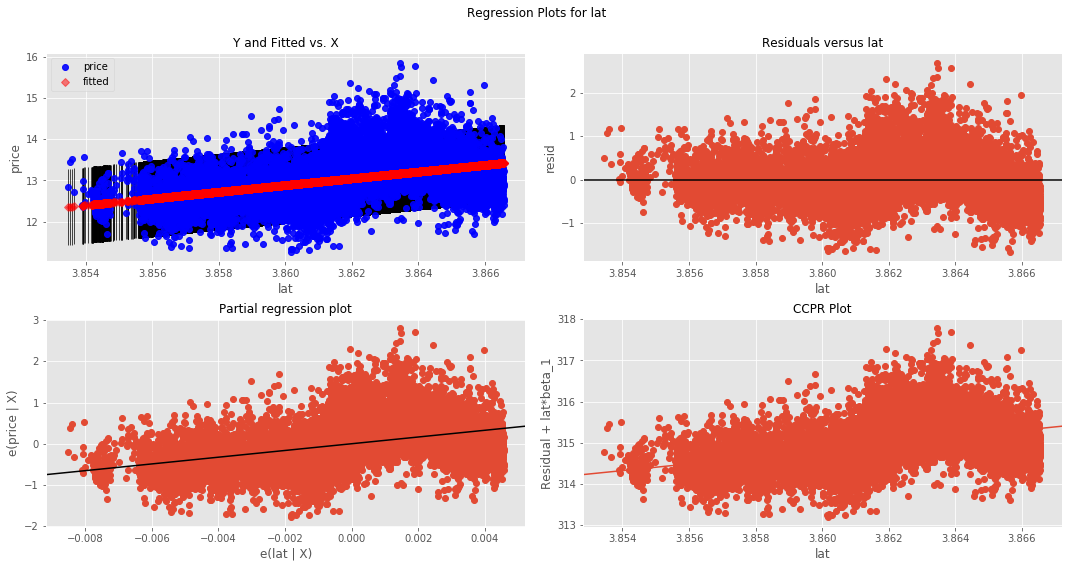

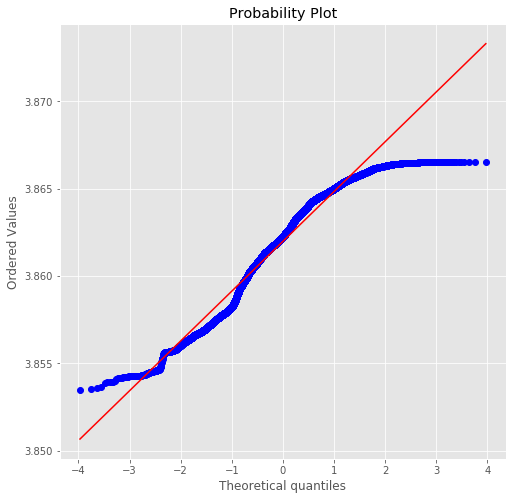

skewness: -0.492393
kurtosis: -0.671504


In [118]:
f = 'price~lat'
# create a fitted model in one line
model = smf.ols(formula=f, data=pred_log).fit()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'lat', fig=fig)
fig = plt.figure(figsize=(8,8))
fig = stats.probplot(pred_log['lat'], plot=plt)
plt.show()

print("skewness: %f" % pred_log['lat'].skew())
print("kurtosis: %f" % pred_log['lat'].kurt())


In [119]:
# qq plot of log transformed lat shows abnormality 
# again confirms log transformation is not suitable for lat 

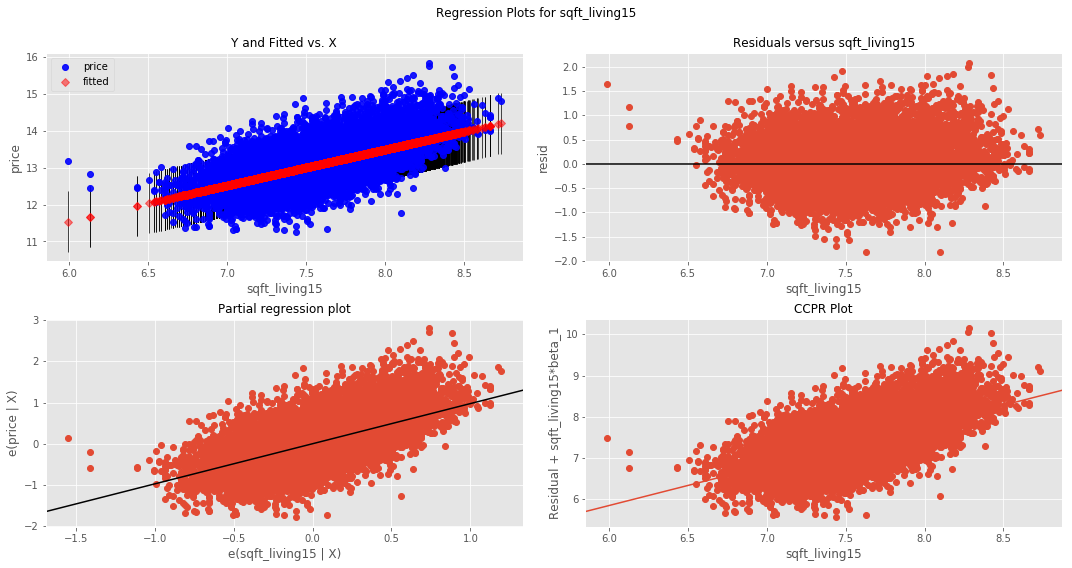

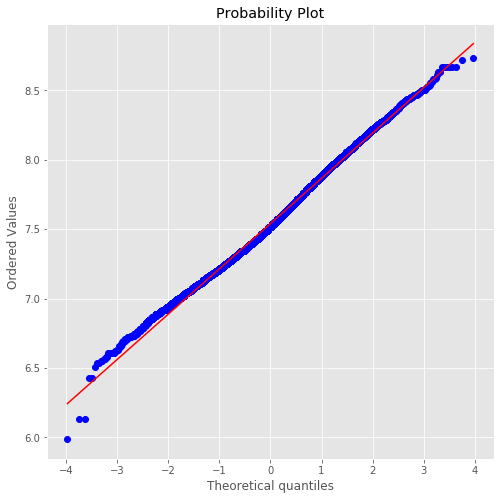

skewness: 0.202832
kurtosis: -0.178602


In [120]:
f = 'price~sqft_living15'
# create a fitted model in one line
model = smf.ols(formula=f, data=pred_log).fit()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living15', fig=fig)
fig = plt.figure(figsize=(8,8))
fig = stats.probplot(pred_log['sqft_living15'], plot=plt)
plt.show()

print("skewness: %f" % pred_log['sqft_living15'].skew())
print("kurtosis: %f" % pred_log['sqft_living15'].kurt())

# From the first and second plot in the first row, residual plot no longer cone-shape after sqft_above log normalized 
# residuals now normally distributed
# slight positive skew
# slightly lighter tails than normal distribution 

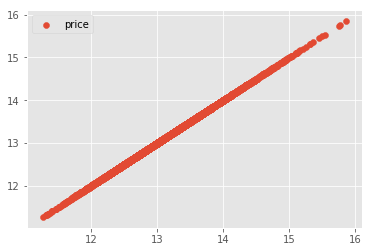

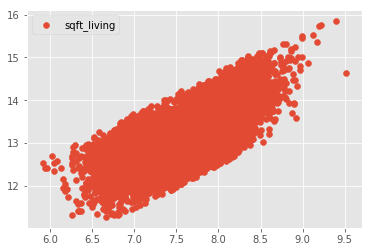

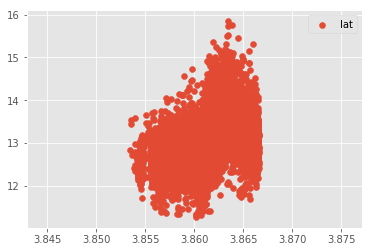

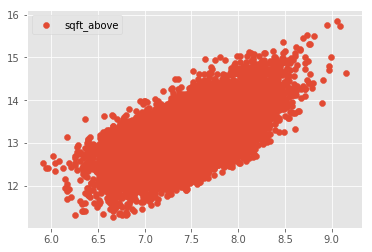

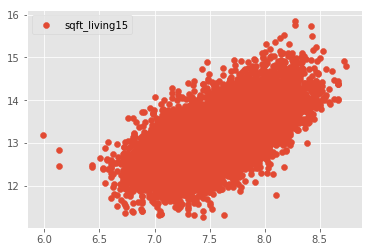

In [121]:
#check linearity after log transformation
for column in pred_log.columns:
    plt.scatter(pred_log[column], pred_log['price'], label=column)
    plt.legend()
    plt.show()

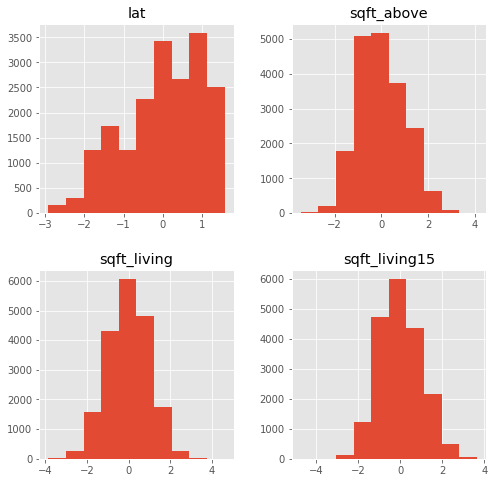

In [122]:
living = pred_log['sqft_living']
above = pred_log['sqft_above']
lat = pre_cont['lat']

living15 = pred_log['sqft_living15']

# standardize continuous variables
features_final = pd.DataFrame()

features_final['sqft_living'] = (living - np.mean(living))/np.sqrt(np.var(living))
features_final['sqft_above'] = (above - np.mean(above))/np.sqrt(np.var(above))
features_final['lat'] = (lat- np.mean(lat))/np.sqrt(np.var(lat))
features_final['sqft_living15'] = (living15 - np.mean(living15))/np.sqrt(np.var(living15))

features_final.hist(figsize = [8,8]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000187F80F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000142324A8>]], dtype=object)

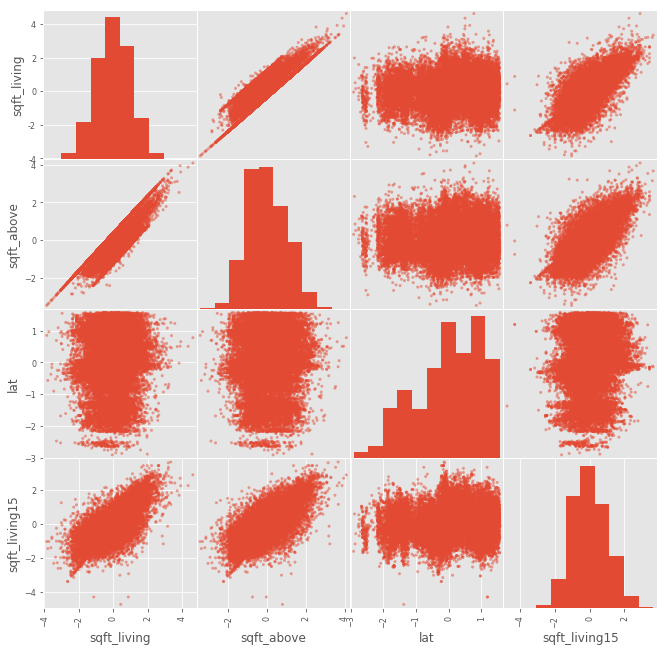

In [123]:
pd.plotting.scatter_matrix(features_final, figsize=[11, 11])

In [124]:
 #check multicollinearity between selected continuous features
features_final.corr()

,sqft_living,sqft_above,lat,sqft_living15
sqft_living,1.000000,0.866069,0.040329,0.745714
sqft_above,0.866069,1.000000,-0.014774,0.713045
lat,0.040329,-0.014774,1.000000,0.042779
sqft_living15,0.745714,0.713045,0.042779,1.000000


In [125]:
abs(features_final.corr()) > .75

,sqft_living,sqft_above,lat,sqft_living15
sqft_living,True,True,False,False
sqft_above,True,True,False,False
lat,False,False,True,False
sqft_living15,False,False,False,True


In [126]:
# drop feature that performs the worst
features_final.drop('sqft_above', axis=1, inplace=True)

In [171]:
feature_final = pd.DataFrame()
feature_final = pd.concat([features_final, predictors.iloc[:, 4:]], axis=1)
feature_final = feature_final[feature_final.columns.drop(feature_final.filter(regex='gr'))]
feature_final['grade'] = df['grade']
feature_final.columns

Index(['sqft_living', 'lat', 'sqft_living15', 'zip_98000_98032',
       'zip_98032_98065', 'zip_98065_98117', 'wf_0_0', 'view_0_0', 'view_1_0',
       'view_2_0', 'view_3_0', 'cond_1', 'cond_2', 'cond_3', 'cond_4',
       'cond_5', 'bath_0_5', 'bath_0_75', 'bath_1_0', 'bath_1_25', 'bath_1_5',
       'bath_1_75', 'bath_2_0', 'bath_2_25', 'bath_2_5', 'bath_2_75',
       'bath_3_0', 'bath_3_25', 'bath_3_5', 'bath_3_75', 'bath_4_0',
       'bath_4_25', 'bath_4_5', 'bath_4_75', 'bath_5_0', 'bath_5_25',
       'bath_5_75', 'bath_7_5', 'flr_1_5', 'flr_2_0', 'flr_2_5', 'flr_3_0',
       'flr_3_5', 'built_1940_1960', 'built_1960_1975', 'built_1975_1988',
       'built_2002_2015', 'price', 'grade'],
      dtype='object')

In [172]:
len(feature_final.columns)

49

In [173]:
feature_final.head()

,sqft_living,lat,sqft_living15,zip_98000_98032,zip_98032_98065,zip_98065_98117,wf_0_0,view_0_0,view_1_0,view_2_0,...,flr_2_0,flr_2_5,flr_3_0,flr_3_5,built_1940_1960,built_1960_1975,built_1975_1988,built_2002_2015,price,grade
0,0.707047,1.161009,-0.328551,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,13.195614,7
1,-2.128968,1.282892,1.126571,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,12.100712,6
2,0.069472,-0.282840,-0.992796,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,13.311329,7
3,-0.293246,0.409515,-0.135745,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,13.142166,8
4,2.462840,0.692948,2.837653,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,14.022525,11


In [174]:
y = feature_final['price']
feature_final.drop('price', axis=1, inplace=True)

In [194]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 15)
selector = selector.fit(feature_final, y)

In [176]:
r_list = []
adj_r_list = []
list_n = list(range(5,49,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(feature_final, np.ravel(y))
    selected_columns = feature_final.columns[select_n.support_ ]
    linreg.fit(feature_final[selected_columns],y)
    yhat = linreg.predict(feature_final[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-feature_final.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

0.49218667269339267
0.49091149405302037
0.7575476341426886
0.7569388079035491
0.7589879381368639
0.7583827286694598
0.7608289001580829
0.7602283135615664
0.7697230130516562
0.7691447606125498


In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_final, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,49,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = feature_final.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

0.0904312939706428
0.09282292097845608
0.0723747446117779
0.07339756710620045
0.07196244923344675
0.07315125921265944
0.06653263234076946
0.067846847831805
0.06369933241056798
0.06574464158269584


In [178]:
feature_final.columns

Index(['sqft_living', 'lat', 'sqft_living15', 'zip_98000_98032',
       'zip_98032_98065', 'zip_98065_98117', 'wf_0_0', 'view_0_0', 'view_1_0',
       'view_2_0', 'view_3_0', 'cond_1', 'cond_2', 'cond_3', 'cond_4',
       'cond_5', 'bath_0_5', 'bath_0_75', 'bath_1_0', 'bath_1_25', 'bath_1_5',
       'bath_1_75', 'bath_2_0', 'bath_2_25', 'bath_2_5', 'bath_2_75',
       'bath_3_0', 'bath_3_25', 'bath_3_5', 'bath_3_75', 'bath_4_0',
       'bath_4_25', 'bath_4_5', 'bath_4_75', 'bath_5_0', 'bath_5_25',
       'bath_5_75', 'bath_7_5', 'flr_1_5', 'flr_2_0', 'flr_2_5', 'flr_3_0',
       'flr_3_5', 'built_1940_1960', 'built_1960_1975', 'built_1975_1988',
       'built_2002_2015', 'grade'],
      dtype='object')

In [195]:
selector.support_

array([ True,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
        True, False,  True], dtype=bool)

In [196]:
selector.ranking_

array([ 1,  1, 23, 27, 28,  1,  1,  1, 24, 20, 25, 22, 26, 33,  1,  1,  1,
       12,  9,  3,  1,  5,  6,  8,  1,  4,  7, 11, 10, 16, 14, 15, 13, 18,
       19, 17,  2,  1, 21, 34,  1, 32, 30, 29,  1,  1, 31,  1])

In [197]:
from sklearn.model_selection import train_test_split
selected_columns = feature_final.columns[selector.support_]
X_train , X_test , y_train , y_test = train_test_split(feature_final[selected_columns], y, test_size=0.2, random_state=3)

In [198]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15331 3833 15331 3833


In [199]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


In [200]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.0672039542646306
Test Mean Squarred Error: 0.06815784605140765


In [201]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
accuracy = regressor.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 76%'

In [202]:
print(linreg.intercept_)
print(linreg.coef_)

12.4350458312
[ 0.1921999   0.19032118  0.10057606 -0.50699063 -0.21114771  0.10529491
  0.1907555  -0.20130753 -0.03060611 -0.05040235 -0.26109965  0.10612349
 -0.09197972 -0.11047299  0.16790035]


In [207]:
a = np.exp(y_hat_test)
sns.distplot(a)
plt.show()

AttributeError: 'float' object has no attribute 'exp'

In [208]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

select_15 = RFE(linreg, n_features_to_select = 15)
select_15 = select_n.fit(feature_final, np.ravel(y))
selected_columns = feature_final.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, feature_final[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.06337245, -0.06814923, -0.06534811, -0.0670098 , -0.06208737,
       -0.06690215, -0.0652039 , -0.06779439, -0.06638989, -0.05415423])

In [210]:
selected_columns = feature_final.columns[selector.support_]
a = pd.concat([feature_final[selected_columns], predictors['price']], axis=1)
outcome = 'price'
pred = a.drop('price', axis=1)
pred_sum = '+'.join(pred.columns)
formula = outcome + '~' + pred_sum

In [211]:
feature_final.columns[selector.support_]

Index(['sqft_living', 'lat', 'zip_98065_98117', 'wf_0_0', 'view_0_0', 'cond_4',
       'cond_5', 'bath_0_5', 'bath_1_5', 'bath_2_5', 'bath_7_5', 'flr_2_5',
       'built_1960_1975', 'built_1975_1988', 'grade'],
      dtype='object')

In [212]:
a.head()

,sqft_living,lat,zip_98065_98117,wf_0_0,view_0_0,cond_4,cond_5,bath_0_5,bath_1_5,bath_2_5,bath_7_5,flr_2_5,built_1960_1975,built_1975_1988,grade,price
0,0.707047,1.161009,0,1,1,0,0,0,0,0,0,0,0,0,7,13.195614
1,-2.128968,1.282892,0,1,1,0,0,0,0,0,0,0,0,0,6,12.100712
2,0.069472,-0.282840,0,1,1,0,1,0,0,0,0,0,1,0,7,13.311329
3,-0.293246,0.409515,1,1,1,0,0,0,0,0,0,0,0,1,8,13.142166
4,2.462840,0.692948,0,1,1,0,0,0,0,0,0,0,0,0,11,14.022525


In [213]:
model = smf.ols(formula, a).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     3989.
Date:                Thu, 24 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:47:14   Log-Likelihood:                -1345.8
No. Observations:               19164   AIC:                             2724.
Df Residuals:                   19148   BIC:                             2849.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.4402      0.030    419.350      0.000      12.382      12.498
zip_98065_98117[T.1]     0.0999      0.005     21.885      0.000       0.091       0.109
wf_0_0[T.1]             -0.5188      0.022    -23.080      0.000      -0.563      -0.475
view_0_0[T.1]           -0.2096      0.007    -30.609      0.000      -0.223      -0.196
cond_4[T.1]              0.1054      0.005     23.167      0.000       0.096       0.114
cond_5[T.1]              0.1838      0.007     25.477      0.000       0.170       0.198
bath_0_5[T.1]           -0.2394      0.130     -1.843      0.065      -0.494       0.015
bath_1_5[T.1]           -0.0330      0.008     -4.289      0.000      -0.048      -0.018
bath_2_5[T.1]           -0.0551      0.005    -11.834      0.000      -0.064      -0.046
bath_7_5[T.1]           -0.2644      0.260     -1.018      0.309      -0.774       0.245
flr_2_5[T.1]             0.1162      0.022      5.314      0.000       0.073       0.159
built_1960_1975[T.1]    -0.0949      0.006    -17.074      0.000      -0.106      -0.084
built_1975_1988[T.1]    -0.1086      0.005    -20.365      0.000      -0.119      -0.098
sqft_living              0.1931      0.003     66.656      0.000       0.187       0.199
lat                      0.1916      0.002     97.590      0.000       0.188       0.195
grade                    0.1688      0.002     67.988      0.000       0.164       0.174
==============================================================================
Omnibus:                      579.918   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              949.358
Skew:                           0.280   Prob(JB):                    7.07e-207
Kurtosis:                       3.936   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

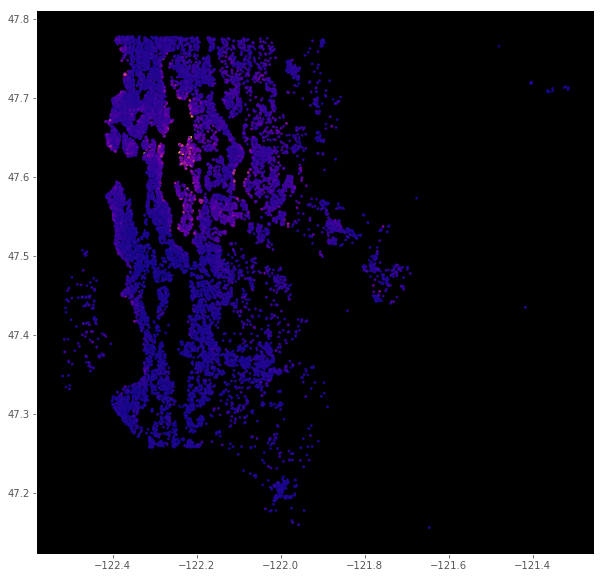

In [37]:
# where are the areas with the highest valued houses?
x = df['lat']
y = df['long']
z= df['price']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y, x, c=z, s=5, cmap=plt.cm.plasma)
ax.patch.set_facecolor('black')
ax.grid(False)